# Projet_P4 : Analysez les ventes de votre entreprise

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
from datetime import datetime
import scipy.stats as stats
from scipy import stats as st
from scipy.stats import pearsonr
%matplotlib inline
# pip install pandas_profiling
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
# pip install --upgrade pingouin
import pingouin as pg
# pip install researchpy
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

##### Téléchargement de la table nettoyée

In [2]:
# on choisit la table de travail (choix 1 : table_imputations_moyenne, choix 2 : table_imputations_mediane)
url = 'INPUTS_FORMATION/table_imputations_moyenne.csv'
table = pd.read_csv(url, sep=',',encoding='utf-8')

##### Indicateurs de tendance centrale et de dispersion

In [3]:
moyenne = np.mean(table['price'])
print('\x1b[6;31;40m',f"{'La Moyenne de prix est     : ' : <30} {round(moyenne, 2)}",'\x1b[0m') 
mediane = np.median(table['price'])
print('\x1b[6;31;40m',f"{'La mediane de prix est     : ' : <30} {round(mediane, 2)}",'\x1b[0m') 
mode = table['price'].mode().iat[0] #df.loc[0].iat[2] : Get value within a series 1stindex, 2dcol
print('\x1b[6;31;40m',f"{'Le mode de prix est        : ' : <30} {round(mode, 2)}",'\x1b[0m') 
variance = np.var(table['price'])
print('\x1b[6;31;40m',f"{'La variance de prix est    : ' : <30} {round(variance, 2)}",'\x1b[0m') 
ecartType = np.std(table['price'])
print('\x1b[6;31;40m',f"{'L ecart type de prix est   : ' : <30} {round(ecartType, 2)}",'\x1b[0m') 
print('\x1b[6;31;40m',f"{'Le Quantile 0,5 vaut       : ' : <30} {np.percentile(table['price'], 50)}",'\x1b[0m') 
Q1 = round(np.percentile(table['price'], 25))
print('\x1b[6;31;40m',f"{'Le Quartile Q1 vaut        : ' : <30} {Q1}",'\x1b[0m') 
Q3 = round(np.percentile(table['price'], 75))
print('\x1b[6;31;40m',f"{'Le Quartile Q3 vaut        : ' : <30} {Q3}",'\x1b[0m') 
print('\x1b[6;31;40m',f"{'L ecart interquartile vaut : ' : <30} {Q3 - Q1}",'\x1b[0m') 

 La Moyenne de prix est     :   17.22 
 La mediane de prix est     :   13.94 
 Le mode de prix est        :   15.99 
 La variance de prix est    :   318.72 
 L ecart type de prix est   :   17.85 
 Le Quantile 0,5 vaut       :   13.94 
 Le Quartile Q1 vaut        :   9 
 Le Quartile Q3 vaut        :   19 
 L ecart interquartile vaut :   10 


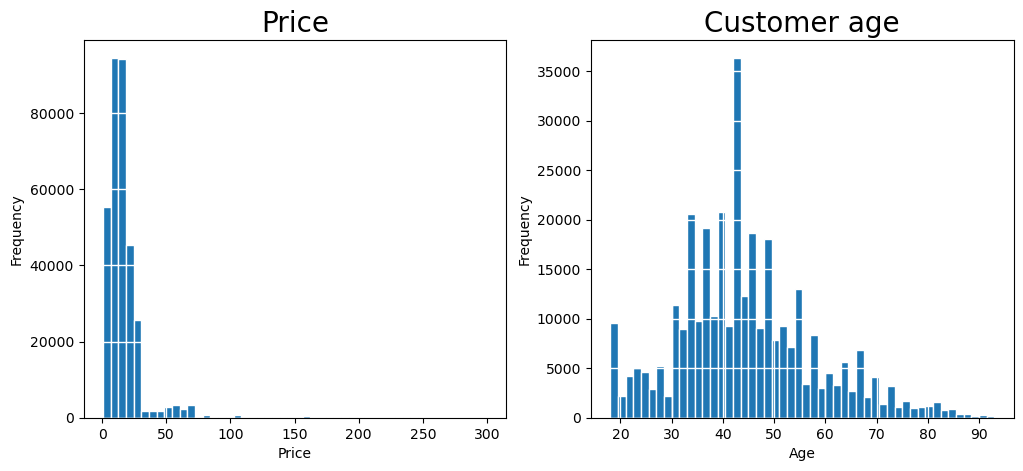

<Figure size 1200x500 with 0 Axes>

In [4]:
# tracés histogrammes
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})
plt.subplot(1, 2, 1)
x = table['price'].sort_values()
plt.hist(x, bins=50,edgecolor='w')
plt.gca().set(title='', ylabel='');
plt.title('Price',fontsize=20)
plt.ylabel("Frequency",fontsize=10)
plt.xlabel('Price',fontsize=10)
plt.xticks(rotation = 0)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)

plt.subplot(1, 2, 2)
y = (2022-table['birth']).sort_values()
plt.hist(y, bins=50,edgecolor='w') 
plt.gca().set(title='', ylabel='');
plt.title('Customer age',fontsize=20)
plt.ylabel("Frequency",fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.xticks(rotation = 0)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()
plt.savefig('OUTPUTS_FORMATION/P4_0_Annexe_Histograms.jpg',dpi=300)

##### Création Histogramme CA cumulé par catégorie

In [5]:
# on crée 2 sous-ensembles puis on les concatène pour créer la série temporelle
table_year_2021 = table.loc[table['année']==2021]
table_year_2021 = table_year_2021.groupby(['mois','categ']).agg({'price':'sum'}) #.sort_values('categ')
table_year_2022 = table.loc[table['année']==2022]
table_year_2022 = table_year_2022.groupby(['mois','categ']).agg({'price':'sum'}) #.sort_values('categ')

# on concatène les 2 datasets
frames = [table_year_2021, table_year_2022]
result = pd.concat(frames, keys=['2021','2022'])

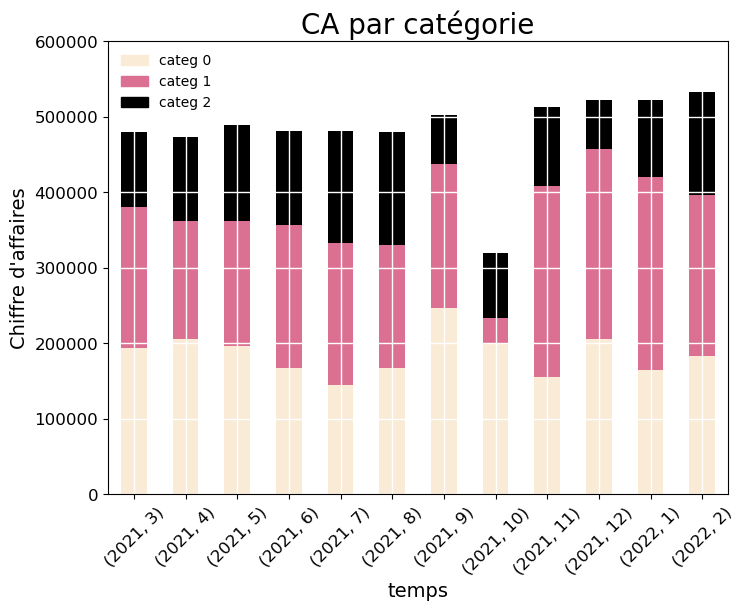

In [6]:
# barplot display
my_colors = ['antiquewhite', 'palevioletred', 'black']
result.unstack().plot(kind='bar', stacked=True, alpha=1,color=my_colors, figsize=(8, 6))

# description
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.title('CA par catégorie',fontsize=20)
plt.ylabel("Chiffre d'affaires",fontsize=14)
plt.xlabel('temps',fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.ylim(0,6e5)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)

# legend
colors = {'categ 0':'antiquewhite', 'categ 1':'palevioletred', 'categ 2':'black'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] #color=colors[label]
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper left',fontsize=10) #, mode="expand", loc='best'
plt.savefig('OUTPUTS_FORMATION/P4_0_Annexe_Histo_octobre.jpg',dpi=300)

##### Investigations [mois d'octobre]

        date    price  jour
0 2021-10-01  7003.79     1
1 2021-10-28  6317.99    28
2 2021-10-29  6425.18    29
3 2021-10-30  6753.69    30
4 2021-10-31  7261.67    31


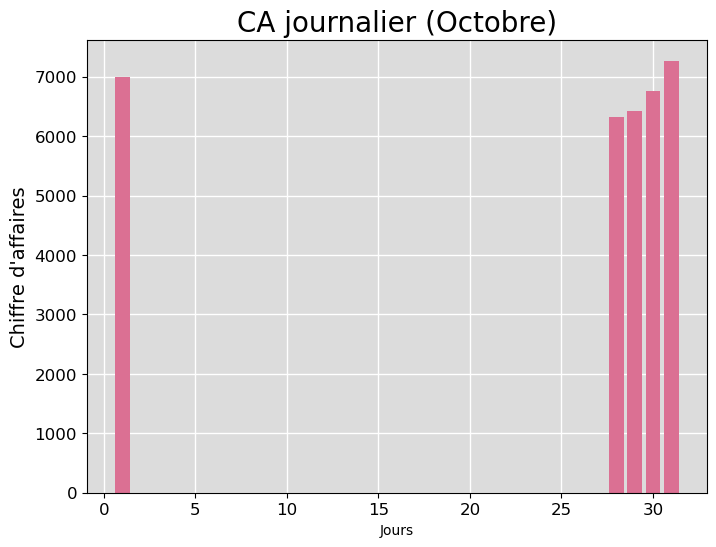

In [7]:
# sélection des données du mois d'octobre + catégorie c1
table_oct_invest = table[(table['mois']==10) & (table['categ']==1.0)]
table_oct_invest = table_oct_invest.groupby(['date']).agg({'price':'sum'}).sort_values('date')
table_oct_invest = table_oct_invest.reset_index(level=['date'])
table_oct_invest['date']  = pd.to_datetime(table_oct_invest['date'])
table_oct_invest['jour']  = table_oct_invest['date'].dt.day
print(table_oct_invest)

# ajout des jours à CA nul/inexistant
for i in range(2,28):
    table_oct_invest = table_oct_invest.append({'jour': i}, ignore_index=True).sort_values('jour')
table_oct_invest['jour'] = table_oct_invest['jour'].apply(np.int64)
plt.bar(x='jour', height='price', data=table_oct_invest, color = 'palevioletred')

# description
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.title('CA journalier (Octobre)',fontsize=20)
plt.ylabel("Chiffre d'affaires",fontsize=14)
plt.xlabel('Jours',fontsize=10)
plt.tick_params(labelsize=12)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.savefig('OUTPUTS_FORMATION/P4_0_Annexe_Histo_octobre_invest.jpg',dpi=300)

##### Choix de la suppression des données biaisées [mois d'octobre]

In [8]:
index_octobre = table.index[table.iloc[:,10]==10]
table.drop(index_octobre,0, inplace=True)
table_raw = table.copy()

##### Création Histogramme CA cumulé corrigé par catégorie

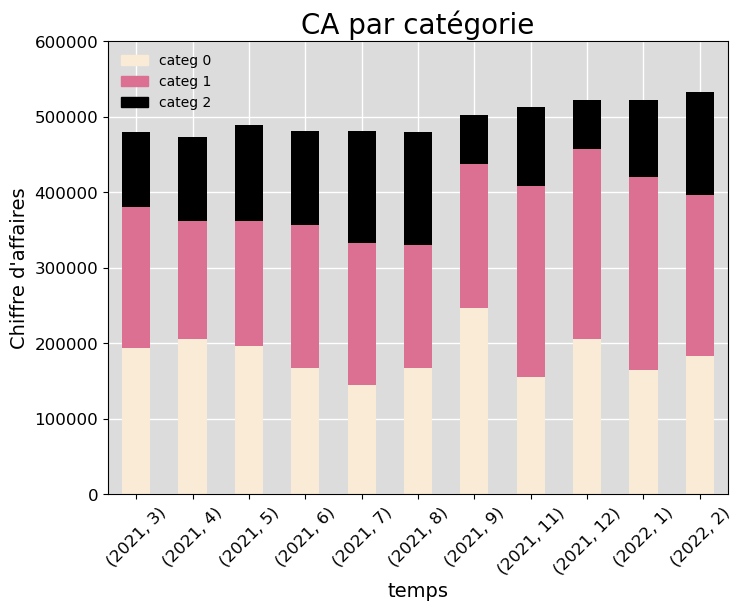

In [9]:
# on crée 2 sous-ensembles puis on les concatène pour créer la série temporelle
table_year_2021 = table.loc[table['année']==2021]
table_year_2021 = table_year_2021.groupby(['mois','categ']).agg({'price':'sum'}) #.sort_values('categ')
table_year_2022 = table.loc[table['année']==2022]
table_year_2022 = table_year_2022.groupby(['mois','categ']).agg({'price':'sum'}) #.sort_values('categ')

#on concatène les 2 datasets
frames = [table_year_2021, table_year_2022]
result = pd.concat(frames, keys=['2021','2022'])

# barplot display
my_colors = ['antiquewhite', 'palevioletred', 'black']
result.unstack().plot(kind='bar', stacked=True, alpha=1,color=my_colors, figsize=(8, 6))

# description
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.title('CA par catégorie',fontsize=20)
plt.ylabel("Chiffre d'affaires",fontsize=14)
plt.xlabel('temps',fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.ylim(0,6e5)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)

# legend
colors = {'categ 0':'antiquewhite', 'categ 1':'palevioletred', 'categ 2':'black'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] #color=colors[label]
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper left',fontsize=10) #, mode="expand", loc='best'
plt.savefig('OUTPUTS_FORMATION/P4_1_1_Histo_temp_CA_v_categ.jpg',dpi=300)

##### Création Histogramme CA cumulé corrigé par sexe

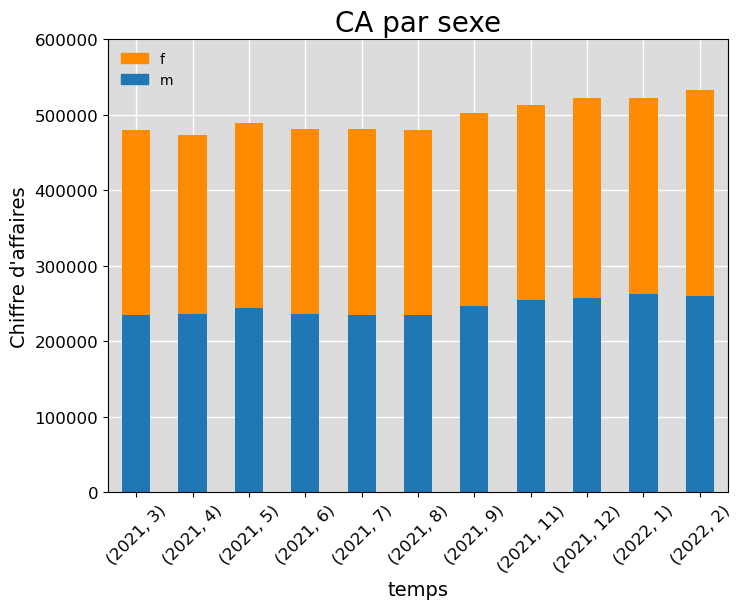

In [10]:
# on crée 2 sous-ensembles puis on les concatène pour créer la série temporelle
table_year_2021 = table.loc[table['année']==2021]
table_year_2021 = table_year_2021.groupby(['mois','sex']).agg({'price':'sum'})
table_year_2022 = table.loc[table['année']==2022]
table_year_2022 = table_year_2022.groupby(['mois','sex']).agg({'price':'sum'})

# on concatène les 2 datasets
frames = [table_year_2021, table_year_2022]
result = pd.concat(frames, keys=['2021','2022'])

# barplot display
my_colors = ['tab:blue','darkorange']
result.unstack().plot(kind='bar', stacked=True, alpha=1,color=my_colors, figsize=(8, 6))

# description
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.title('CA par sexe',fontsize=20)
plt.ylabel("Chiffre d'affaires",fontsize=14)
plt.xlabel('temps',fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.ylim(0,6e5)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)

# legend
colors = {'f':'darkorange','m':'tab:blue'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] #color=colors[label]
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper left',fontsize=10) #, mode="expand", loc='best'
plt.savefig('OUTPUTS_FORMATION/P4_1_2_Histo_temp_CA_v_sexe.jpg',dpi=300)

In [11]:
# création colonne Tranches âge
bins = [18,30,50,100]
labels = ['18-30', '31-50', '+51']
table['age_Range'] = pd.cut(table['age'], bins, labels = labels,include_lowest = True)

##### Création Histogramme CA cumulé corrigé par tranche d'âge

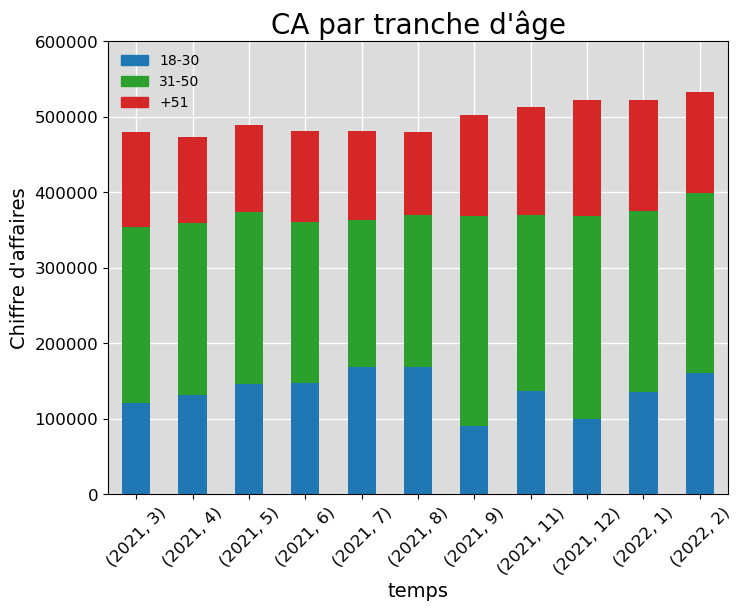

In [12]:
# on crée 2 sous-ensembles puis on les concatène pour créer la série temporelle
table_year_2021 = table.loc[table['année']==2021]
table_year_2021 = table_year_2021.groupby(['mois','age_Range']).agg({'price':'sum'})
table_year_2022 = table.loc[table['année']==2022]
table_year_2022 = table_year_2022.groupby(['mois','age_Range']).agg({'price':'sum'})

# on concatène les 2 datasets
frames = [table_year_2021, table_year_2022]
df_frequence_per_age_Rang = pd.concat(frames, keys=['2021','2022'])

# barplot display
my_colors = ['tab:blue', 'tab:green', 'tab:red']
df_frequence_per_age_Rang.unstack().plot(kind='bar', stacked=True, alpha=1,color=my_colors, figsize=(8, 6))

# description
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.title("CA par tranche d'âge",fontsize=20)
plt.ylabel("Chiffre d'affaires",fontsize=14)
plt.xlabel('temps',fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'
plt.ylim(0,6e5)

# legend
colors = {'18-30':'tab:blue', '31-50':'tab:green', '+51':'tab:red'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] #color=colors[label]
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper left',fontsize=10) #, mode="expand", loc='best'
plt.savefig('OUTPUTS_FORMATION/P4_1_3_Histo_temp_CA_v_age.jpg',dpi=300)

##### Création BoxPlots Prix

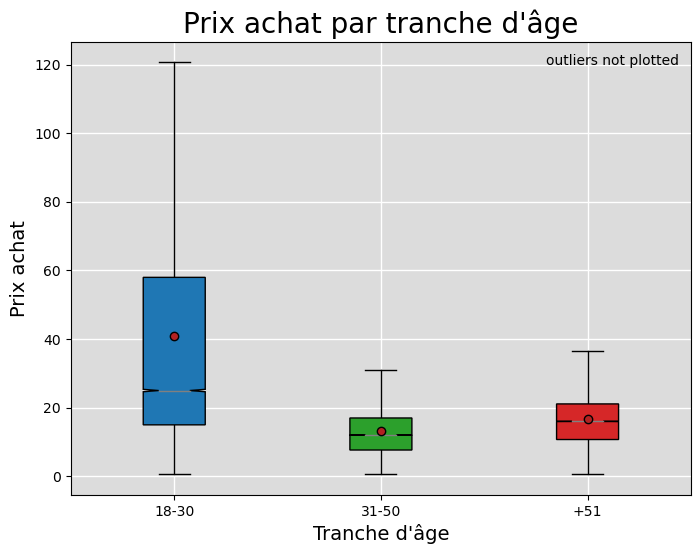

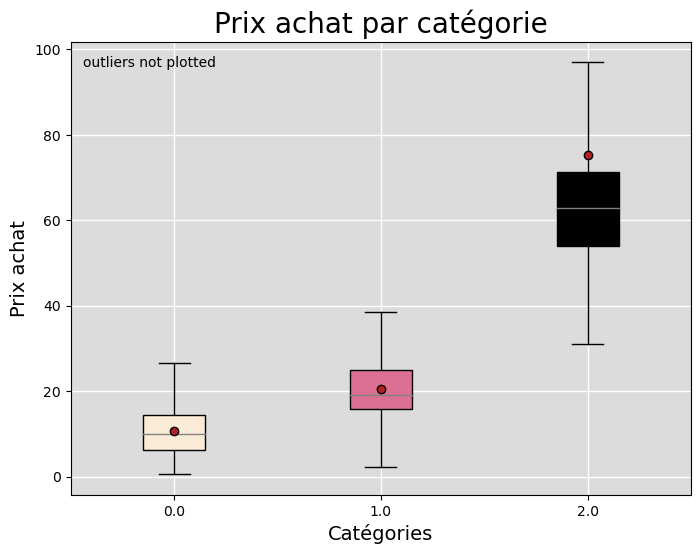

In [13]:
plt.subplots(figsize=(8, 6))
X = "age_Range" # qualitative
Y = "price"     # quantitative
sous_echantillon = table[table["price"] > 0].sort_values('age_Range').copy()
modalites = sous_echantillon[X].unique() 
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
medianprops = {'color':"grey"}
meanprops   = {'marker':'o','markeredgecolor':'black','markerfacecolor':'firebrick'}
box = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,vert=True, patch_artist=True, 
                  showmeans=True, meanprops=meanprops, notch=True)
colors = ['tab:blue', 'tab:green', 'tab:red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.title("Prix achat par tranche d'âge",fontsize=20)
plt.ylabel("Prix achat",fontsize=14)
plt.xlabel("Tranche d'âge",fontsize=14)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True) 
plt.text(2.8, 120, "outliers not plotted",fontsize=10,color='k')
plt.savefig('OUTPUTS_FORMATION/P4_2_1_BOX_price_v_age.jpg',dpi=300)
plt.show()

plt.subplots(figsize=(8, 6))
X = "categ" # qualitative
Y = "price" # quantitative
sous_echantillon = table[table["price"] > 0].sort_values('categ').copy()
modalites = sous_echantillon[X].unique() 
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
medianprops = {'color':"grey"}
meanprops   = {'marker':'o','markeredgecolor':'black','markerfacecolor':'firebrick'}
box = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,vert=True, patch_artist=True, 
            showmeans=True, meanprops=meanprops)
colors = ['antiquewhite', 'palevioletred', 'black']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.title("Prix achat par catégorie",fontsize=20)
plt.ylabel("Prix achat",fontsize=14)
plt.xlabel("Catégories",fontsize=14)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True) 
plt.text(0.56, 96, "outliers not plotted",fontsize=10,color='k')
plt.savefig('OUTPUTS_FORMATION/P4_2_2_BOX_price_v_categ.jpg',dpi=300)
plt.show()

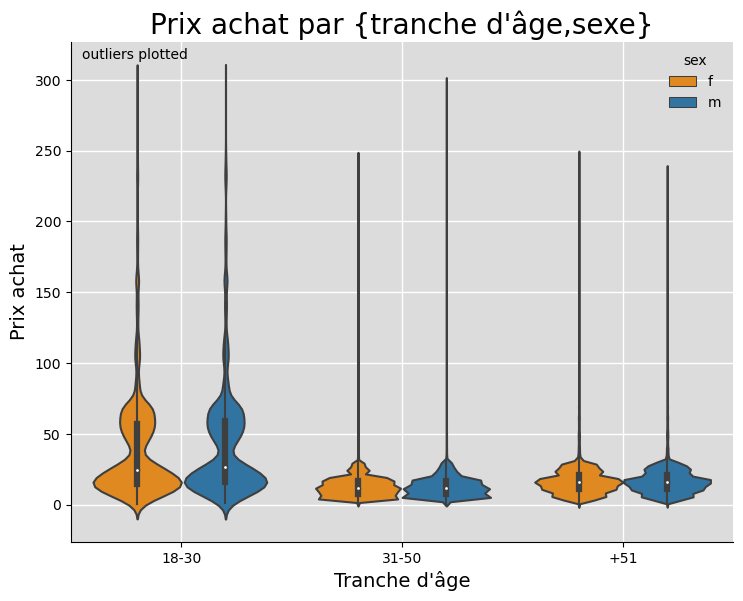

In [14]:
my_colors = ['tab:blue','darkorange']
colors    = {'f':'darkorange','m':'tab:blue'} 
g = sns.catplot(data=table, x='age_Range', y='price', kind="violin",hue="sex",palette = colors,legend=True, legend_out=False)
g.fig.set_size_inches(8,6)
g.fig.subplots_adjust(top=.95)
plt.title("Prix achat par {tranche d'âge,sexe}",fontsize=20)
plt.xlabel("Tranche d'âge",fontsize=14)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.text(-0.45, 315, "outliers plotted",fontsize=10,color='k')
plt.ylabel('Prix achat',fontsize=14)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'
plt.savefig('OUTPUTS_FORMATION/P4_3_1_Violin_price_v_age.jpg',dpi=300)

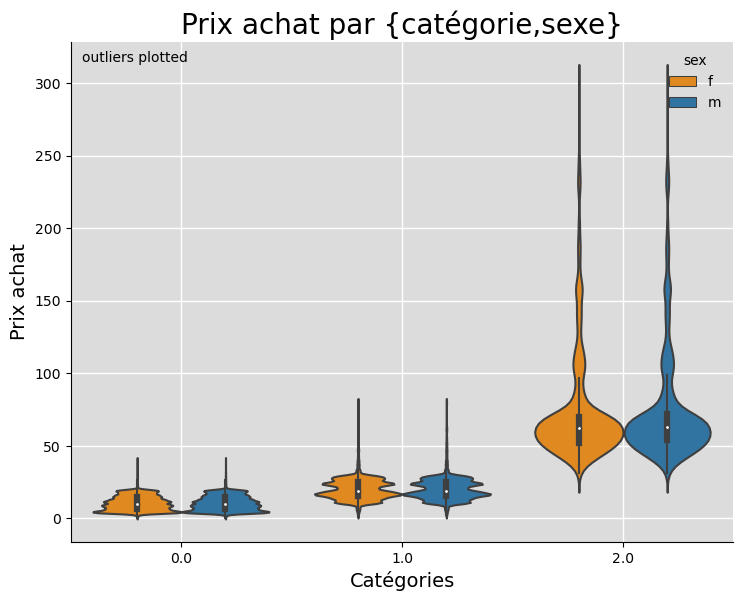

In [15]:
my_colors = ['tab:blue','darkorange']
colors    = {'f':'darkorange','m':'tab:blue'} 
g = sns.catplot(data=table, x='categ', y='price', kind="violin",hue="sex",palette = colors,legend=True, legend_out=False)#,height=4
g.fig.set_size_inches(8,6)
g.fig.subplots_adjust(top=.95)
plt.title("Prix achat par {catégorie,sexe}",fontsize=20)
plt.xlabel("Catégories",fontsize=14)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.text(-0.45, 315, "outliers plotted",fontsize=10,color='k')
plt.ylabel('Prix achat',fontsize=14)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'
plt.savefig('OUTPUTS_FORMATION/P4_3_2_Violin_price_v_categ.jpg',dpi=300)

##### Création Histogramme Volume ventes  par catégorie

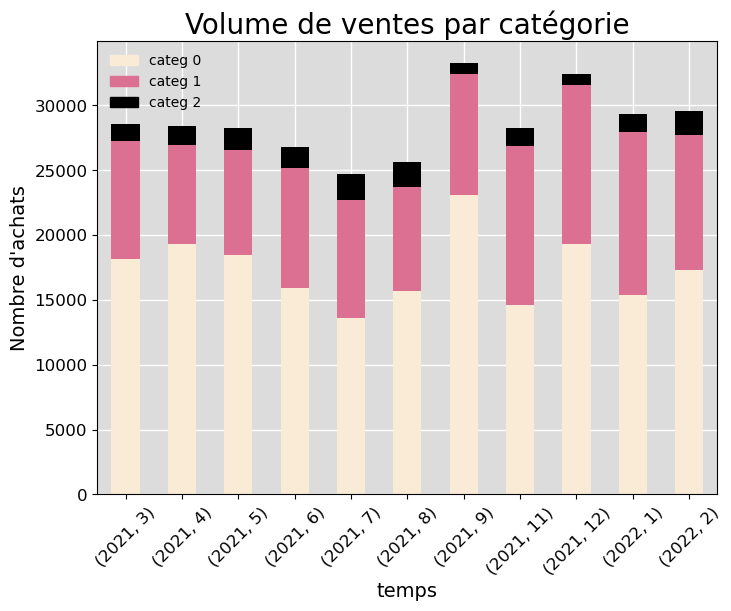

In [16]:
# on crée 2 sous-ensembles puis on les concatène pour créer la série temporelle
table_year_2021 = table.loc[table['année']==2021]
table_year_2021 = table_year_2021.groupby(['mois','categ']).agg({'price':'count'}) 
table_year_2022 = table.loc[table['année']==2022]
table_year_2022 = table_year_2022.groupby(['mois','categ']).agg({'price':'count'}) 

# on concatène les 2 datasets
frames = [table_year_2021, table_year_2022]
df_frequence_per_categ = pd.concat(frames, keys=['2021','2022'])

# barplot display
my_colors = ['antiquewhite', 'palevioletred', 'black']
df_frequence_per_categ.unstack().plot(kind='bar', stacked=True, alpha=1,color=my_colors, figsize=(8, 6))

# description
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.title("Volume de ventes par catégorie",fontsize=20)
plt.ylabel("Nombre d'achats",fontsize=14)
plt.xlabel('temps',fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'

# legend
colors = {'categ 0':'antiquewhite', 'categ 1':'palevioletred', 'categ 2':'black'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] #color=colors[label]
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper left',fontsize=10) #, mode="expand", loc='best'
plt.savefig('OUTPUTS_FORMATION/P4_4_1_Histo_temp_nbachat_v_categ.jpg',dpi=300)

##### Création Histogramme Volume ventes par sexe

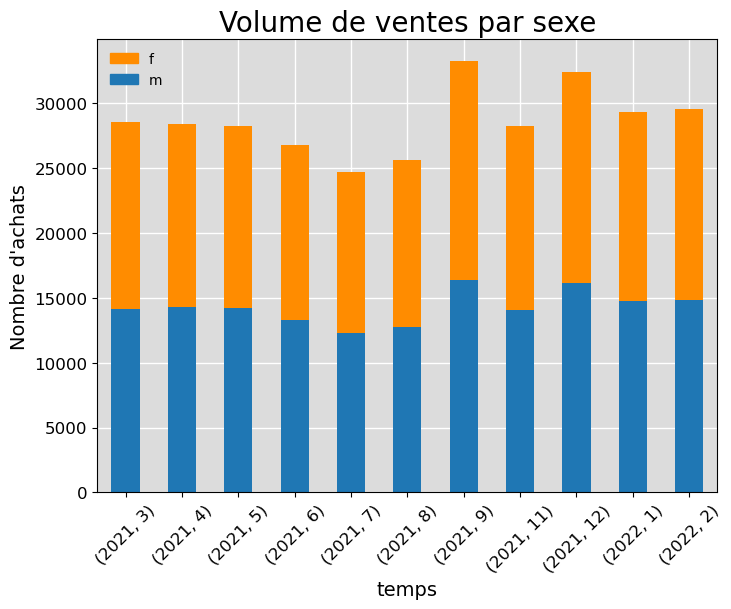

In [17]:
# on crée 2 sous-ensembles puis on les concatène pour créer la série temporelle
table_year_2021 = table.loc[table['année']==2021]
table_year_2021 = table_year_2021.groupby(['mois','sex']).agg({'price':'count'}) 
table_year_2022 = table.loc[table['année']==2022]
table_year_2022 = table_year_2022.groupby(['mois','sex']).agg({'price':'count'}) 

# on concatène les 2 datasets
frames = [table_year_2021, table_year_2022]
df_frequence_per_sex = pd.concat(frames, keys=['2021','2022'])

# barplot display
my_colors = ['tab:blue','darkorange']
df_frequence_per_sex.unstack().plot(kind='bar', stacked=True, alpha=1,color=my_colors, figsize=(8, 6))

# description
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.title("Volume de ventes par sexe",fontsize=20)
plt.ylabel("Nombre d'achats",fontsize=14)
plt.xlabel('temps',fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'

# legend
colors = {'f':'darkorange','m':'tab:blue'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] #color=colors[label]
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper left',fontsize=10) #, mode="expand", loc='best'
plt.savefig('OUTPUTS_FORMATION/P4_4_2_Histo_temp_nbachat_v_sexe.jpg',dpi=300)

##### Création Histogramme Volume ventes par tranche d'âge

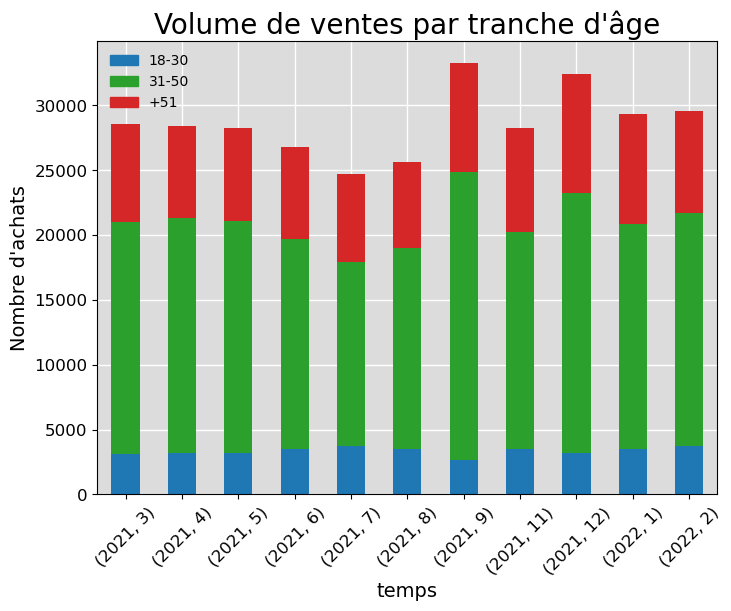

In [18]:
# on crée 2 sous-ensembles puis on les concatène pour créer la série temporelle
table_year_2021 = table.loc[table['année']==2021]
table_year_2021 = table_year_2021.groupby(['mois','age_Range']).agg({'price':'count'})
table_year_2022 = table.loc[table['année']==2022]
table_year_2022 = table_year_2022.groupby(['mois','age_Range']).agg({'price':'count'})

# on concatène les 2 datasets
frames = [table_year_2021, table_year_2022]
df_frequence_per_age_Rang = pd.concat(frames, keys=['2021','2022'])

# barplot display
my_colors = ['tab:blue', 'tab:green', 'tab:red']
df_frequence_per_age_Rang.unstack().plot(kind='bar', stacked=True, alpha=1,color=my_colors, figsize=(8, 6))

# description
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.title("Volume de ventes par tranche d'âge",fontsize=20)
plt.ylabel("Nombre d'achats",fontsize=14)
plt.xlabel('temps',fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'

# legend
colors = {'18-30':'tab:blue', '31-50':'tab:green', '+51':'tab:red'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] #color=colors[label]
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper left',fontsize=10) #, mode="expand", loc='best'
plt.savefig('OUTPUTS_FORMATION/P4_4_3_Histo_temp_nbachat_v_age.jpg',dpi=300)

##### Création Scatter et Pie plots

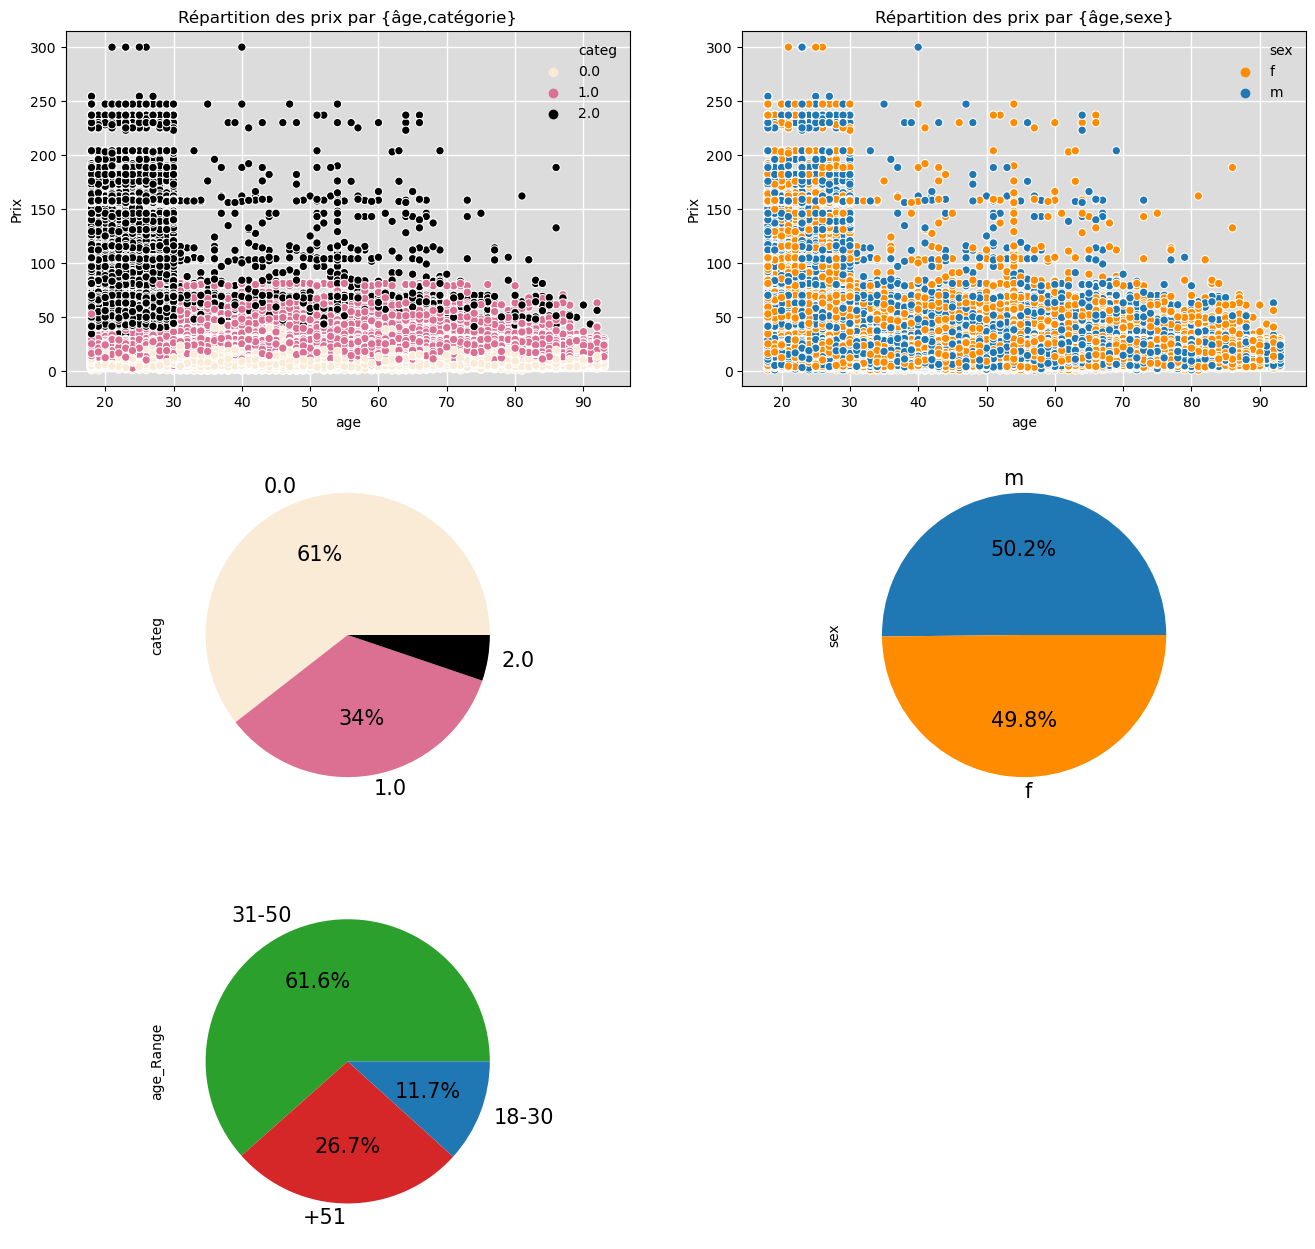

In [19]:
# changement type [categ] pour contourner des valeurs continues dans la légende
table['categ']  = table['categ'].astype('category')

mycolors = ['antiquewhite', 'palevioletred', 'black']
table_per_categ_sex = table.groupby(['categ','sex']).agg({'price':'sum'}) #.sort_values('categ')
table_per_categ_sex_cnt = table.groupby(['categ','sex']).agg({'price':'count'}) #.sort_values('categ')

# description
plt.subplots(figsize=(16, 16))
plt.subplot(3, 2, 1)
plt.title('Répartition des prix par {âge,catégorie}')
plt.xlabel("Age")
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
sns.scatterplot(data=table, x="age", y="price", hue="categ",palette = mycolors)
plt.ylabel('Prix')

plt.subplot(3, 2, 2)
plt.title('Répartition des prix par {âge,sexe}')
plt.xlabel("Age")
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
my_colors = ['darkorange','tab:blue']
sns.scatterplot(data=table, x="age", y="price", hue="sex",palette = my_colors)
plt.ylabel('Prix')

plt.subplot(3, 2, 3)
table['categ'].value_counts().plot.pie(colors = mycolors, autopct='%1.0f%%',fontsize=15)

plt.subplot(3, 2, 4)
my_colors = ['tab:blue','darkorange']
colors = {'f':'darkorange','m':'tab:blue'} 
table['sex'].value_counts().plot.pie(colors = my_colors,autopct='%1.1f%%',fontsize=15)

plt.subplot(3, 2, 5)
my_colors = ['tab:green', 'tab:red', 'tab:blue']
table['age_Range'].value_counts().plot.pie(colors = my_colors,autopct='%1.1f%%',fontsize=15)
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.savefig('OUTPUTS_FORMATION/P4_5_Scatter_&_pie.jpg',dpi=300)

##### Création Bar plots du CA par catégorie

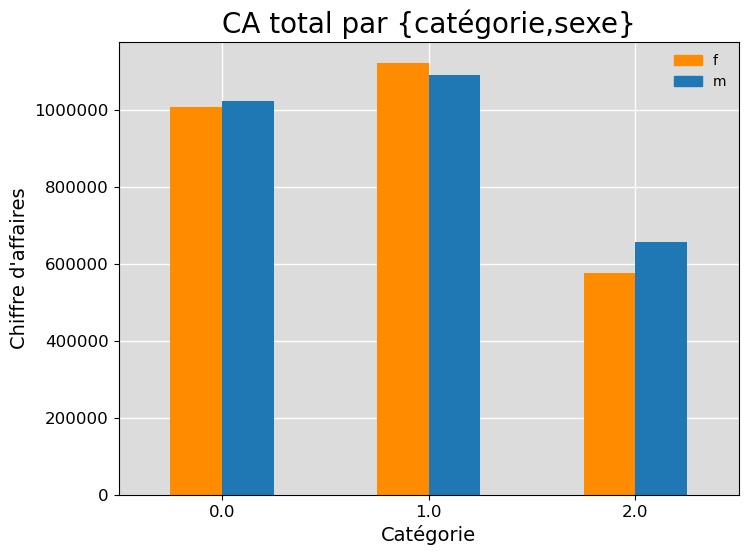

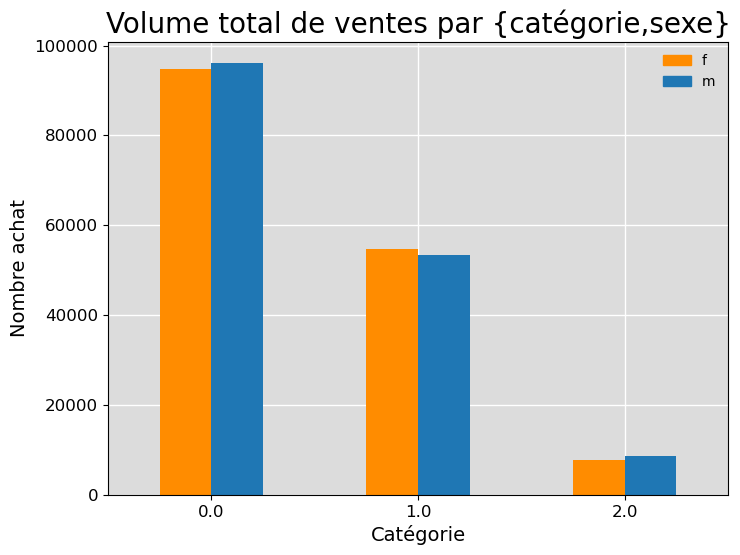

In [20]:
my_colors = ['darkorange','tab:blue']
colors    = {'f':'darkorange','m':'tab:blue'} 

table_per_C_S_sum = table.groupby(['categ','sex']).agg({'price':'sum'}) #.sort_values('categ')
table_per_C_S_sum.unstack().plot(kind='bar', stacked=False, alpha=1, figsize=(8, 6),color=my_colors)

# description
plt.title('CA total par {catégorie,sexe}',fontsize=20)
plt.ylabel("Chiffre d'affaires",fontsize=14)
plt.xlabel('Catégorie',fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 0)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# legend    
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] #color=colors[label]
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper right',fontsize=10) #, mode="expand", loc='best'
plt.savefig('OUTPUTS_FORMATION/P4_6_1_Histo_CA_tot_v_categ.jpg',dpi=300)


        
table_per_C_S_val = table.groupby(['categ','sex']).agg({'price':'count'}) #.sort_values('categ')
table_per_C_S_val.unstack().plot(kind='bar', stacked=False, alpha=1, figsize=(8, 6),color=my_colors)

# description
plt.title('Volume total de ventes par {catégorie,sexe}',fontsize=20)
plt.ylabel("Nombre achat",fontsize=14)
plt.xlabel('Catégorie',fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 0)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'

# legend       
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] 
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper right',fontsize=10)
plt.savefig('OUTPUTS_FORMATION/P4_6_2_Histo_VOL_tot_v_categ.jpg',dpi=300)

##### Création Bar plots du CA par tranche d'âge

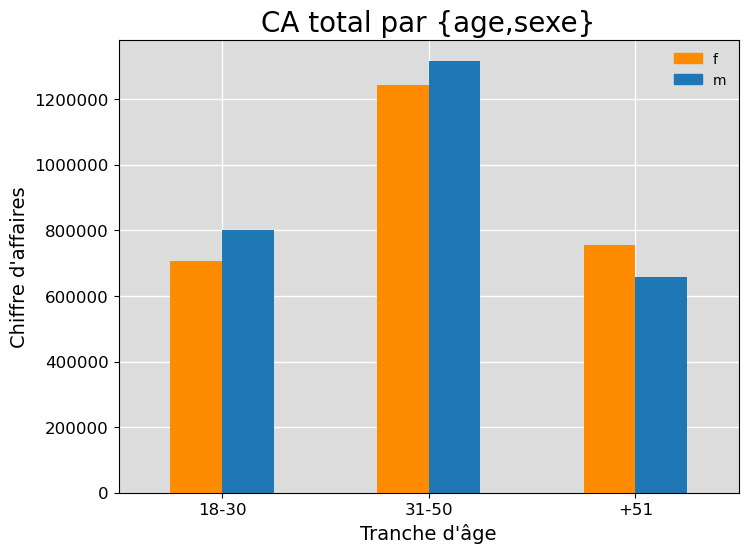

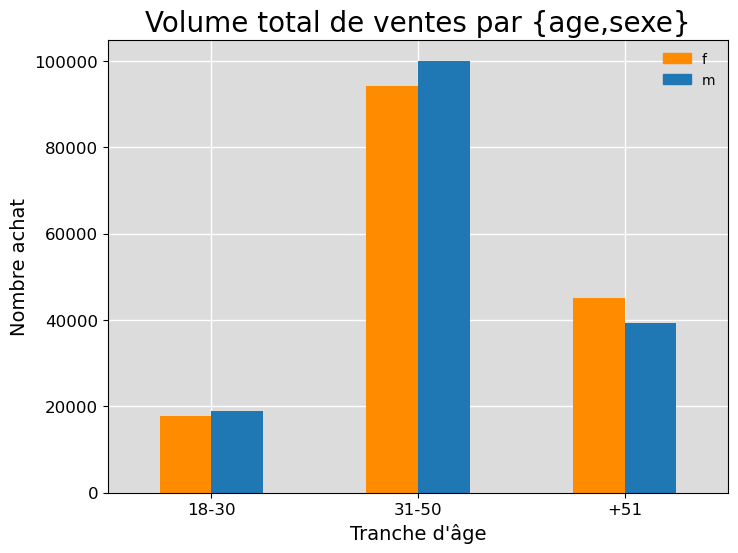

In [21]:
my_colors = ['darkorange','tab:blue']
colors = {'f':'darkorange','m':'tab:blue'} 

table_per_C_S_sum = table.groupby(['age_Range','sex']).agg({'price':'sum'})
table_per_C_S_sum.unstack().plot(kind='bar', stacked=False, alpha=1, figsize=(8, 6),color=my_colors)

# description
plt.title('CA total par {age,sexe}',fontsize=20)
plt.ylabel("Chiffre d'affaires",fontsize=14)
plt.xlabel("Tranche d'âge",fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 0)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# legend    
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels]
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper right',fontsize=10) #, mode="expand", loc='best'
plt.savefig('OUTPUTS_FORMATION/P4_6_3_Histo_CA_tot_v_age.jpg',dpi=300)


        
table_per_C_S_val = table.groupby(['age_Range','sex']).agg({'price':'count'}) 
table_per_C_S_val.unstack().plot(kind='bar', stacked=False, alpha=1, figsize=(8, 6),color=my_colors)

# description
plt.title('Volume total de ventes par {age,sexe}',fontsize=20)
plt.ylabel("Nombre achat",fontsize=14)
plt.xlabel("Tranche d'âge",fontsize=14)
plt.tick_params(labelsize=12)
plt.xticks(rotation = 0)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = 'gainsboro' #'whitesmoke' gainsboro
plt.rcParams["legend.edgecolor"] = 'None' #'black'
plt.rcParams["legend.facecolor"] = 'None' #'inherit'

# legend       
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] 
plt.legend(handles, labels, ncol=1, shadow=False, loc='upper right',fontsize=10)
plt.savefig('OUTPUTS_FORMATION/P4_6_4_Histo_VOL_tot_v_age.jpg',dpi=300)

##### courbe de Lorenz et indice de Gini

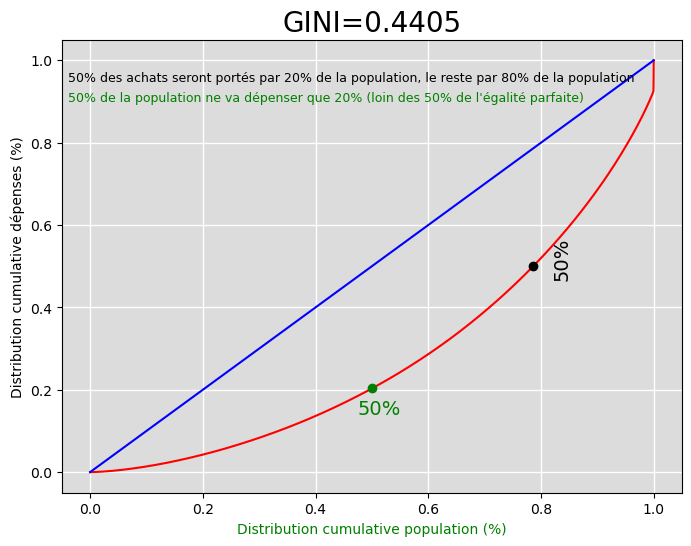

In [22]:
# tri par ordre croissant du montant d'achat par individu
table_per_ind = table.groupby(['client_id']).agg({'price':'sum'}).sort_values('price')

# on enregistre dans une liste regroupant le montant du panier
arr = np.array(table_per_ind['price'])

# on définit 2 fonctions qui vont calculer l'indice de GINI ainsi que les valeurs caractéristiques de la courbe de Lorenz
def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    scaled_prefix_sum = arr.cumsum() / arr.sum() # ratio sum/total_sum
    return np.insert(scaled_prefix_sum, 0, 0)    # ajout valeur 0 pour borner le tracé
lorenz_curve = lorenz(arr)

# les valeurs doivent être comprises entre 0.0 et 1.0
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve,color='r')

# affichage de la première bissectrice (égalité parfaite)
plt.plot([0,1], [0,1],color='b')

# on va interpoler par itération sur la courbe de Lorenz pour récupération du x pr y = 50% (i.e "dépenses égalitaires")
# on positionne le point de partage
plt.plot(0.786, 
         np.interp(0.786,np.linspace(0.0, 1.0, lorenz_curve.size),lorenz_curve), 
         color='k', 
         marker = 'o')

# on va interpoler par itération sur la courbe de Lorenz pour récupération du y pr x = 50% (i.e "populations égalitaires")
# on positionne le point de partage
plt.plot(0.5, 
         np.interp(0.5,np.linspace(0.0, 1.0, lorenz_curve.size),lorenz_curve), 
         color='g', 
         marker = 'o')

plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
plt.title('GINI='+ str(round(gini(arr),4)),fontsize=20)
plt.text(0.82, 0.475, "50%",fontsize=14, rotation=90)
plt.text(0.475, 0.14, "50%",fontsize=14,color='g')
plt.text(-0.04, 0.95, "50% des achats seront portés par 20% de la population, le reste par 80% de la population",fontsize=9)
plt.text(-0.04, 0.9, "50% de la population ne va dépenser que 20% (loin des 50% de l'égalité parfaite)",fontsize=9,color='g')
plt.xlabel('Distribution cumulative population (%)',color='g')
plt.ylabel('Distribution cumulative dépenses (%)')
plt.savefig('OUTPUTS_FORMATION/P4_7_GINI_Lorenz.jpg',dpi=300,edgecolor='none')

## CORRELATIONS

## Corrélation entre deux variables qualitatives (test du χ² d'indépendance (Ki-2))

 Correlation : age_Range vs categ 
Ki-2 calculé :       141163.549
Ki-2 scipy :         141163.549
degrés de lib :      9
Pvalue :             0.0
 Correlation : sex vs categ 
Ki-2 calculé :       79.18 
Ki-2 scipy :         79.18
degrés de lib :      6
Pvalue :             0.0


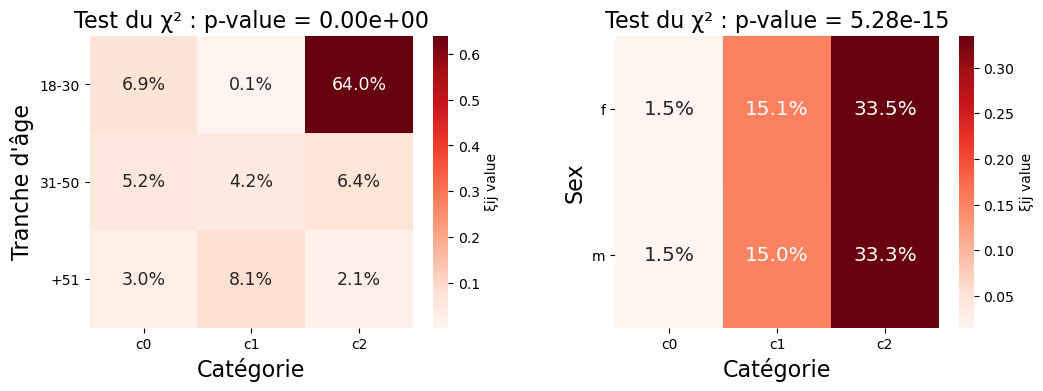

In [23]:
# on renomme les values categ -> string
table = table_raw.copy()
table['categ'] = table['categ'].replace(0 ,'c0')
table['categ'] = table['categ'].replace(1 ,'c1')
table['categ'] = table['categ'].replace(2 ,'c2')

# rappel création colonne Tranches âge
bins = [18,30,50,100]
labels = ['18-30', '31-50', '+51']
table['age_Range'] = pd.cut(table['age'], bins, labels = labels,include_lowest = True)

# barplot display
plt.subplots(figsize=(12, 4))
plt.subplot(1, 2, 1)

X = "age_Range"
Y = "categ"
cont = table[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total") # Tableau cont(Observées Oij)
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(table)
indep = tx.dot(ty) / n                                      # tableau représentant le cas d'indépendance (Calculées Cij théor)
c = cont.fillna(0)                                                                     # On remplace les valeurs nulles par 0
freq = (c-indep)**2/indep                     # Matrice contenant les ξij=(nij−(ni.nj)/n)²/(ni.nj) pour chaque case du tableau
xi_n = freq.sum().sum()                                                                         # Sommes nlig & ncol  => Chi-2
ratio = freq/xi_n                                                                           # Normalisation par ξn *100 (=> %)
print('\x1b[6;30;44m','Correlation :' ,X, 'vs', Y,'\x1b[0m') 
print(f"{'Ki-2 calculé :' : <20} {round(xi_n,3)}") 
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print(f"{'Ki-2 scipy :' : <20} {round(st_chi2,3)}",)  
print(f"{'degrés de lib :' : <20} {st_dof}")  
print(f"{'Pvalue :' : <20} {st_p}") 
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
fig=sns.heatmap(ratio.iloc[:-1,:-1],cmap='Reds', annot=ratio.iloc[:-1,:-1], 
            fmt='.1%',cbar_kws={'label': 'ξij value'},
            annot_kws={"size": 25 / np.sqrt(len(ratio))})
plt.yticks(rotation = 0)
plt.title('Test du χ² : p-value = '+str('%.2e' %st_p),fontsize=16)
plt.xlabel('Catégorie',fontsize=16)
plt.ylabel("Tranche d'âge",fontsize=16)


plt.subplot(1, 2, 2)
X = "sex"
Y = "categ"
cont = table[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(table)
indep = tx.dot(ty) / n                       
c = cont.fillna(0)                         
freq = (c-indep)**2/indep                    
xi_n = freq.sum().sum()                      
ratio = freq/xi_n                            
print('\x1b[6;30;44m','Correlation :' ,X, 'vs', Y,'\x1b[0m') 
print(f"{'Ki-2 calculé :' : <20} {round(xi_n,3)}",'\x1b[0m') 
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print(f"{'Ki-2 scipy :' : <20} {round(st_chi2,3)}")  
print(f"{'degrés de lib :' : <20} {st_dof}")  
print(f"{'Pvalue :' : <20} {round(st_p,3)}") 
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
heatmap_plot = sns.heatmap(ratio.iloc[:-1,:-1],cmap='Reds', annot=ratio.iloc[:-1,:-1], 
            fmt='.1%',cbar_kws={'label': 'ξij value'},
            annot_kws={"size": 25 / np.sqrt(len(ratio))})
plt.yticks(rotation = 0)
plt.title('Test du χ² : p-value = '+str('%.2e' %st_p),fontsize=16)
plt.xlabel('Catégorie',fontsize=16)
plt.ylabel('Sex',fontsize=16)
plt.subplots_adjust(hspace=0.1, wspace=0.3,bottom=.15)
plt.savefig('OUTPUTS_FORMATION/P4_8_Khi2_age_&_sex_v_categ.jpg',dpi=300)

In [24]:
print('\x1b[6;33;40m',"Avec une p_value < 5% (degré de significativité fixé), on peut donc rejeter l’hypothèse d'indépendance (Ho). \n On peut considérer que les variables « Age des clients » et « Catégorie des produits » sont corrélées.",'\x1b[0m') 
print('')
print('\x1b[6;33;40m',"Avec une p_value < 5% (degré de significativité fixé), on peut donc rejeter l’hypothèse d'indépendance (Ho). \n On peut considérer que les variables « Sexe des clients » et « Catégorie des produits » sont corrélées.",'\x1b[0m') 

 Avec une p_value < 5% (degré de significativité fixé), on peut donc rejeter l’hypothèse d'indépendance (Ho). 
 On peut considérer que les variables « Age des clients » et « Catégorie des produits » sont corrélées. 

 Avec une p_value < 5% (degré de significativité fixé), on peut donc rejeter l’hypothèse d'indépendance (Ho). 
 On peut considérer que les variables « Sexe des clients » et « Catégorie des produits » sont corrélées. 


## Corrélation entre une variable quantitative et une variable qualitative (ANOVA)

### Création des tables de travail

In [25]:
# panier total, nb d'articles par session
TABLE_ANOVA = table.groupby(['session_id','age_Range']).agg({'price':'sum','id_prod':'count'}).sort_values('age_Range') 
TABLE_ANOVA = TABLE_ANOVA.reset_index(level=['age_Range'])
TABLE_ANOVA.rename(columns={'price':'panier_total','id_prod':"nb_articles"}, inplace=True)

# fréquence d'achats annuelle
TABLE_ANOVA_f = table.groupby(['client_id','age_Range','age']).agg({'session_id':'count'}).sort_values('age_Range')  
TABLE_ANOVA_f = TABLE_ANOVA_f.reset_index(level=['age_Range','age'])
TABLE_ANOVA_f.rename(columns={'session_id':'freq_per_year'}, inplace=True)

In [26]:
# fréquence d'achats mensuelle
TABLE_ANOVA_f2 = table.groupby(['mois','client_id','age_Range','age']).agg({'session_id':'count'}).sort_values('mois') 
TABLE_ANOVA_f2 = TABLE_ANOVA_f2.reset_index(level=['mois','client_id','age_Range','age'])
TABLE_ANOVA_f2 = TABLE_ANOVA_f2.groupby(['client_id','mois','age_Range','age']).agg({'session_id':'mean'}).sort_values('age_Range') 
TABLE_ANOVA_f2.rename(columns={'session_id':'freq_per_month'}, inplace=True)
TABLE_ANOVA_f2 = TABLE_ANOVA_f2.reset_index(level=['age_Range','age'])

### One-Way ANOVA (Statsmodels)

Le η2 s’interprétera toujours de la même façon :

η2 = SSbetween / SStotal = SSB / SST
   = proportion of variance in Y explained by X
   = squared non-linear corr coeff
   = R²
   = intensité de la corrélation

η2 ranges between 0 and 1.

En règle générale : 0.01 ~ small , 0.06 ~ medium > , 0.14 ~ large

In [27]:
X = "panier_total"
Y = "age_Range"
mod = ols('panier_total ~ age_Range', data=TABLE_ANOVA).fit()              
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']
print('\x1b[6;30;44m',X.upper(),'vs',Y.upper(),'\x1b[0m')
print(aov_table)
print('\x1b[6;31;40m',f"{'F statistic               = ' : <10}{round(aov_table['F'][0],0)}",'\x1b[0m')
print('\x1b[6;31;40m',f"{'p-value for F statistics  = ' : <10}{aov_table['PR(>F)'][0]}",'\x1b[0m')
print('\x1b[6;31;40m',f"{'η2                        = ' : <10}{round(aov_table['EtaSq'][0],2)}",'\x1b[0m')
print('\x1b[6;33;40m',"Avec un F >> 1 and p_value < 5%, on peut donc rejeter l’hypothèse d'égalité des moyennes (Ho). \n On peut considérer que la variable « Age des clients » influe sur le « Montant d'achat ».",'\x1b[0m') 

X = "nb_articles"
Y = "age_Range"
mod = ols('nb_articles ~ age_Range', data=TABLE_ANOVA).fit()              
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']
print('\n\n')
print('\x1b[6;30;44m',X.upper(),'vs',Y.upper(),'\x1b[0m')
print(aov_table)
print('\x1b[6;31;40m',f"{'F statistic               = ' : <10}{round(aov_table['F'][0],0)}",'\x1b[0m')
print('\x1b[6;31;40m',f"{'p-value for F statistics  = ' : <10}{aov_table['PR(>F)'][0]}",'\x1b[0m')
print('\x1b[6;31;40m',f"{'η2                        = ' : <10}{round(aov_table['EtaSq'][0],2)}",'\x1b[0m')
print('\x1b[6;33;40m',"Avec un F >> 1 and p_value < 5%, on peut donc rejeter l’hypothèse d'égalité des moyennes (Ho). \n On peut considérer que la variable « Age des clients » influe sur le « Nombre d'articles ».",'\x1b[0m') 

X = "freq_per_year"
Y = "age_Range"
mod = ols('freq_per_year ~ age_Range', data=TABLE_ANOVA_f).fit()              
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']
print('\n\n')
print('\x1b[6;30;44m',X.upper(),'vs',Y.upper(),'\x1b[0m')
print(aov_table)
print('\x1b[6;31;40m',f"{'F statistic               = ' : <10}{round(aov_table['F'][0],0)}",'\x1b[0m')
print('\x1b[6;31;40m',f"{'p-value for F statistics  = ' : <10}{aov_table['PR(>F)'][0]}",'\x1b[0m')
print('\x1b[6;31;40m',f"{'η2                        = ' : <10}{round(aov_table['EtaSq'][0],2)}",'\x1b[0m')
print('\x1b[6;33;40m',"Avec un F >> 1 and p_value < 5%, on peut donc rejeter l’hypothèse d'égalité des moyennes (Ho). \n On peut considérer que la variable « Age des clients » influe sur la « Fréquence d'achat annuelle ».",'\x1b[0m') 

X = "freq_per_month"
Y = "age_Range"
mod = ols('freq_per_month ~ age_Range', data=TABLE_ANOVA_f2).fit()              
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']
print('\n\n')
print('\x1b[6;30;44m',X.upper(),'vs',Y.upper(),'\x1b[0m')
print(aov_table)
print('\x1b[6;31;40m',f"{'F statistic               = ' : <10}{round(aov_table['F'][0],0)}",'\x1b[0m')
print('\x1b[6;31;40m',f"{'p-value for F statistics  = ' : <10}{aov_table['PR(>F)'][0]}",'\x1b[0m')
print('\x1b[6;31;40m',f"{'η2                        = ' : <10}{round(aov_table['EtaSq'][0],2)}",'\x1b[0m')
print('\x1b[6;33;40m',"Avec un F >> 1 and p_value < 5%, on peut donc rejeter l’hypothèse d'égalité des moyennes (Ho). \n On peut considérer que la variable « Age des clients » influe sur la « Fréquence d'achat mensuelle ».",'\x1b[0m')

 PANIER_TOTAL vs AGE_RANGE 
                 sum_sq        df            F  PR(>F)     EtaSq
age_Range  5.143865e+06       2.0  4284.400862     0.0  0.017796
Residual   2.839072e+08  472941.0          NaN     NaN       NaN
 F statistic               = 4284.0 
 p-value for F statistics  = 0.0 
 η2                        = 0.02 
 Avec un F >> 1 and p_value < 5%, on peut donc rejeter l’hypothèse d'égalité des moyennes (Ho). 
 On peut considérer que la variable « Age des clients » influe sur le « Montant d'achat ». 



 NB_ARTICLES vs AGE_RANGE 
                  sum_sq        df             F  PR(>F)     EtaSq
age_Range   82455.095838       2.0  32670.317961     0.0  0.121387
Residual   596816.895501  472941.0           NaN     NaN       NaN
 F statistic               = 32670.0 
 p-value for F statistics  = 0.0 
 η2                        = 0.12 
 Avec un F >> 1 and p_value < 5%, on peut donc rejeter l’hypothèse d'égalité des moyennes (Ho). 
 On peut considérer que la variable « Age des c

### One-Way ANOVA (Openclassroom)

 η2 = Vinterclasses / Vtotale = 0.21     AGE_RANGE vs PANIER_TOTAL 


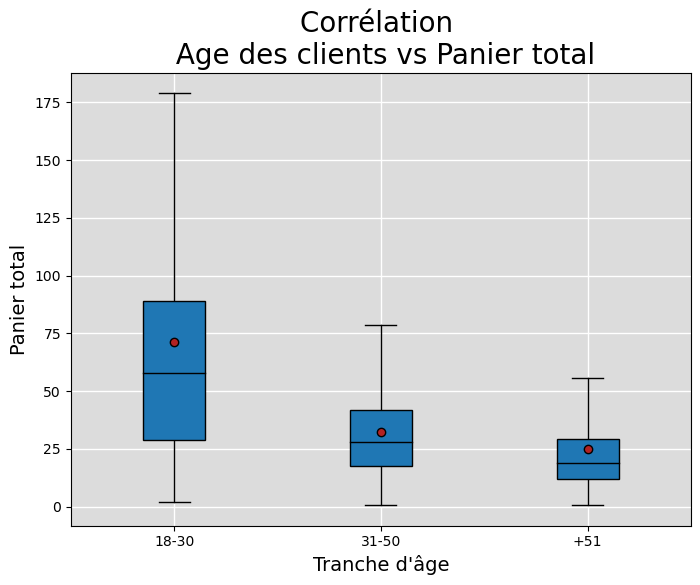

 η2 = Vinterclasses / Vtotale = 0.12     AGE_RANGE vs NB_ARTICLES 


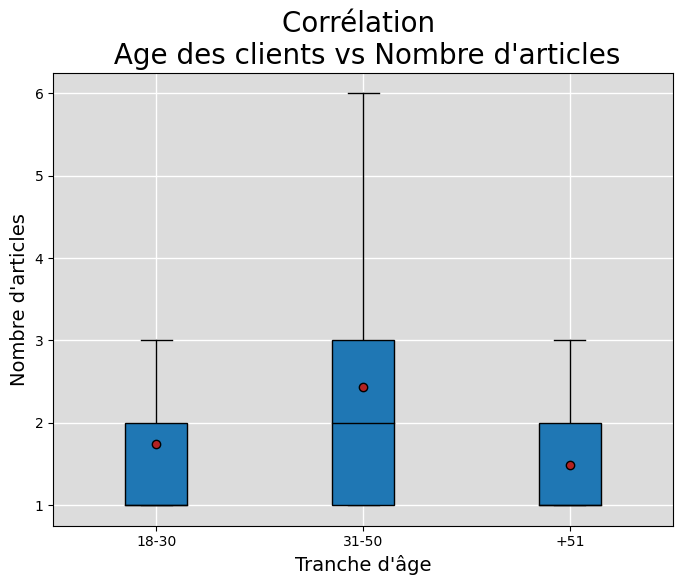

 η2 = Vinterclasses / Vtotale = 0.01     AGE_RANGE vs FREQ_PER_YEAR 


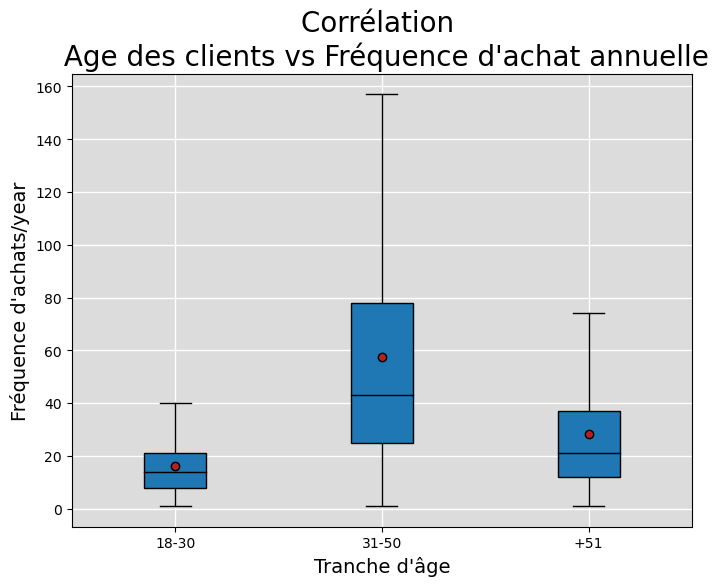

 η2 = Vinterclasses / Vtotale = 0.01     AGE_RANGE vs FREQ_PER_MONTH 


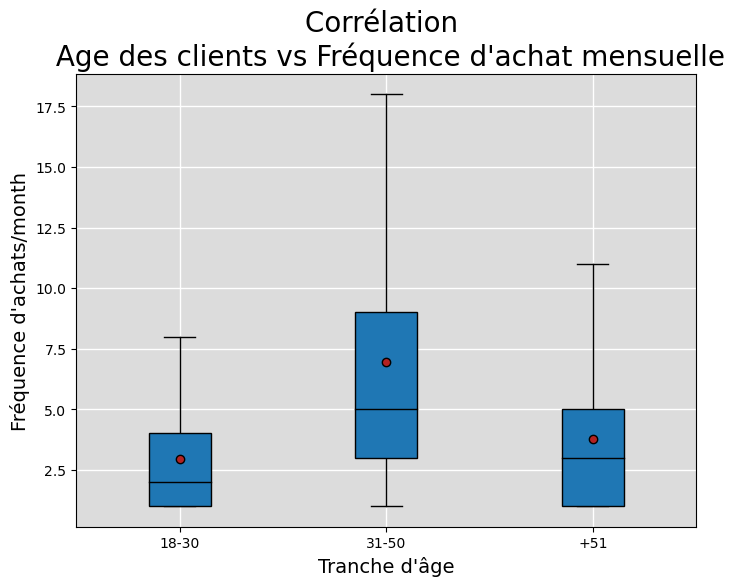

In [28]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

plt.subplots(figsize=(8, 6))
X = "age_Range"    # qualitative
Y = "panier_total" # quantitative
sous_echantillon = TABLE_ANOVA[TABLE_ANOVA["panier_total"] > 0].copy()
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
medianprops = {'color':"black"}
meanprops   = {'marker':'o','markeredgecolor':'black','markerfacecolor':'firebrick'}
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,vert=True, patch_artist=True, 
            showmeans=True, meanprops=meanprops)
plt.title("Corrélation \n Age des clients vs Panier total",fontsize=20)
plt.ylabel("Panier total",fontsize=14)
plt.xlabel("Tranche d'âge",fontsize=14)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True) 
eta = eta_squared(sous_echantillon[X],sous_echantillon[Y])
plt.savefig('OUTPUTS_FORMATION/P4_9_1_ANOVA_age_v_paniertot.jpg',dpi=300)
print('\x1b[6;31;40m','η2 = Vinterclasses / Vtotale = %.2f' %eta,'   ',X.upper(),'vs',Y.upper(),'\x1b[0m')
plt.show()

plt.subplots(figsize=(8, 6))
X = "age_Range"   # qualitative
Y = "nb_articles" # quantitative
sous_echantillon = TABLE_ANOVA[TABLE_ANOVA["nb_articles"] > 0].copy()
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
medianprops = {'color':"black"}
meanprops   = {'marker':'o','markeredgecolor':'black','markerfacecolor':'firebrick'}
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,vert=True, patch_artist=True, 
            showmeans=True, meanprops=meanprops)
plt.title("Corrélation \n Age des clients vs Nombre d'articles",fontsize=20)
plt.ylabel("Nombre d'articles",fontsize=14)
plt.xlabel("Tranche d'âge",fontsize=14)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)  
eta = eta_squared(sous_echantillon[X],sous_echantillon[Y])
plt.savefig('OUTPUTS_FORMATION/P4_9_2_ANOVA_age_v_nbarticles.jpg',dpi=300)
print('\x1b[6;31;40m','η2 = Vinterclasses / Vtotale = %.2f' %eta,'   ',X.upper(),'vs',Y.upper(),'\x1b[0m')
plt.show()

plt.subplots(figsize=(8, 6))
X = "age_Range"     # qualitative
Y = "freq_per_year" # quantitative
sous_echantillon = TABLE_ANOVA_f[TABLE_ANOVA_f["freq_per_year"] > 0].copy()  
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
medianprops = {'color':"black"}
meanprops   = {'marker':'o','markeredgecolor':'black','markerfacecolor':'firebrick'}
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,vert=True, patch_artist=True, 
            showmeans=True, meanprops=meanprops)
plt.title("Corrélation \n Age des clients vs Fréquence d'achat annuelle",fontsize=20)
plt.ylabel("Fréquence d'achats/year",fontsize=14)
plt.xlabel("Tranche d'âge",fontsize=14)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)   
eta = eta_squared(sous_echantillon[X],sous_echantillon[Y])
print('\x1b[6;31;40m','η2 = Vinterclasses / Vtotale = %.2f' %eta,'   ',X.upper(),'vs',Y.upper(),'\x1b[0m')
plt.savefig('OUTPUTS_FORMATION/P4_9_3_ANOVA_age_v_freq_year.jpg',dpi=300)
plt.show()

plt.subplots(figsize=(8, 6))
X = "age_Range"      # qualitative
Y = "freq_per_month" # quantitative
sous_echantillon = TABLE_ANOVA_f2[TABLE_ANOVA_f2["freq_per_month"] > 0].copy()  
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
medianprops = {'color':"black"}
meanprops   = {'marker':'o','markeredgecolor':'black','markerfacecolor':'firebrick'}
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,vert=True, patch_artist=True, 
            showmeans=True, meanprops=meanprops)
plt.title("Corrélation \n Age des clients vs Fréquence d'achat mensuelle",fontsize=20)
plt.ylabel("Fréquence d'achats/month",fontsize=14)
plt.xlabel("Tranche d'âge",fontsize=14)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True) 
eta = eta_squared(sous_echantillon[X],sous_echantillon[Y])
print('\x1b[6;31;40m','η2 = Vinterclasses / Vtotale = %.2f' %eta,'   ',X.upper(),'vs',Y.upper(),'\x1b[0m')
plt.savefig('OUTPUTS_FORMATION/P4_9_4_ANOVA_age_v_freq_month.jpg',dpi=300)
plt.show()

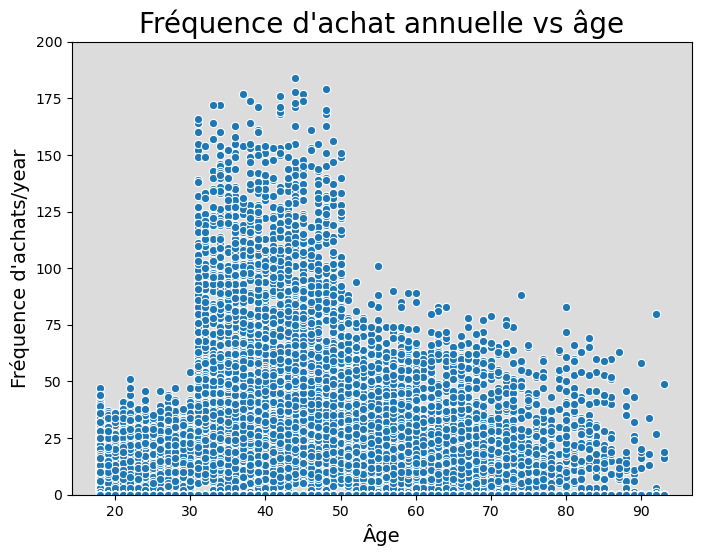

In [29]:
# Scatter fréquence d'achats annuelle vs age
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
# plt.grid(color='gray', linestyle='-', linewidth=1)
# plt.grid(True)
plt.ylim(0,200)
sns.scatterplot(data=TABLE_ANOVA_f, x="age", y="freq_per_year")
plt.title("Fréquence d'achat annuelle vs âge",fontsize=20)
plt.ylabel("Fréquence d'achats/year",fontsize=14)
plt.xlabel("Âge",fontsize=14)
plt.savefig('OUTPUTS_FORMATION/P4_9_5_scatter_freq_year.jpg',dpi=300)
plt.show()

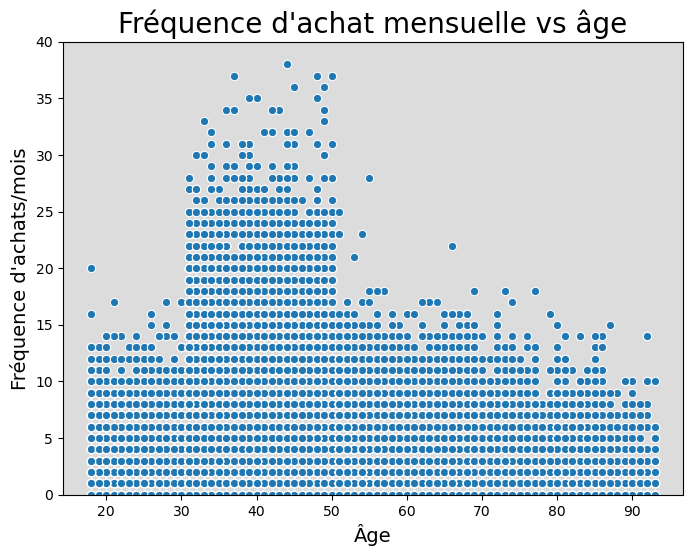

In [30]:
# Scatter fréquence d'achats mensuelle vs age
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
# plt.grid(color='gray', linestyle='-', linewidth=1)
# plt.grid(True)
plt.ylim(0,40)
sns.scatterplot(data=TABLE_ANOVA_f2, x="age", y="freq_per_month")
plt.title("Fréquence d'achat mensuelle vs âge",fontsize=20)
plt.ylabel("Fréquence d'achats/mois",fontsize=14)
plt.xlabel("Âge",fontsize=14)
plt.savefig('OUTPUTS_FORMATION/P4_9_6_scatter_freq_month.jpg',dpi=300)
plt.show()

## Corrélation entre deux variables quantitatives

### Création d'une table additionnelle (avec âge en tant que variable continue)

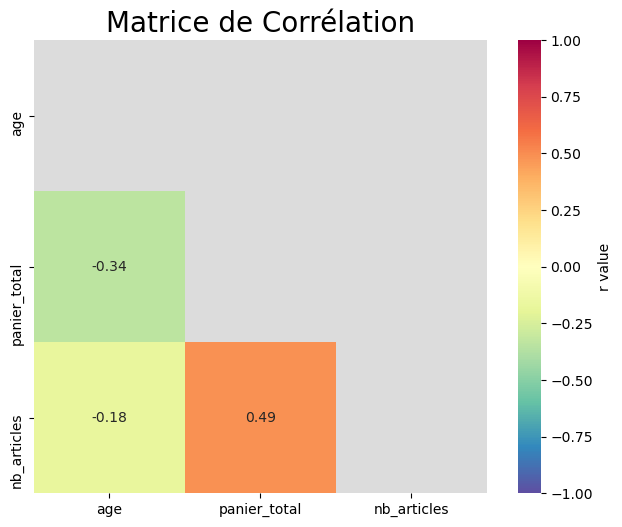

In [31]:
# panier total, nb d'articles et age
TABLE_ANOVA_pears = table.groupby(['session_id','age']).agg({'price':'sum','id_prod':'count'}).sort_values('age') 
TABLE_ANOVA_pears = TABLE_ANOVA_pears.reset_index(level=['age'])
TABLE_ANOVA_pears.rename(columns={'age':'age','price':'panier_total','id_prod':"nb_articles"}, inplace=True)

# Corrélation     r Négative        r Positive
# Faible         −0,5 à 0,0         0,0 à 0,5
# Forte          −1,0 à −0,5        0,5 à 1,0

plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
corrMatrix = TABLE_ANOVA_pears.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrMatrix, cmap='Spectral_r',fmt='.2f',mask=mask, square=True, vmin=-1, vmax=1,
            cbar_kws={'label': 'r value'},annot=corrMatrix.iloc[:,:]) #
plt.title("Matrice de Corrélation",fontsize=20)
plt.savefig('OUTPUTS_FORMATION/P4_10_PEARSON_matrix.jpg',dpi=300)
plt.show()